# Customer 360 Degree View

Olist adalah department store terbesar di Brasil. Olist menghubungkan bisnis kecil dari seluruh Brasil ke saluran sehingga pedagang tersebut dapat menjual produk mereka melalui Toko Olist dan mengirimkannya ke pelanggan melalui mitra logistik Olist.

Mekanisme dari Olist adalah pertama pelanggan membeli produk dari Olist Store, lalu penjual akan diinfokan untuk mengirimkan pesanan tersebut. Setelah produk diterma pelanggan, survei kepuasan akan diberikan kepada pelanggan melalui email untuk menceritakan pengalaman melakukan pembelian di Olist Store.

**> TUGAS : BUAT CUSTOMER 360 DEGREE VIEW**

> Customer 360 degree view adalah sebuah gambaran lengkap yang menjelaskan pengalaman perjalanan pengguna dengan perusahaan secara luas. Jadi semua informasi mengenai pelanggan dikumpulkan dan dianalisis supaya perusahaan dapat memberikan layanan terbaik secara efektif dan efisien kepada pelanggan. Karena customer 360 degree view ini ingin melihat pengalaman pengguna secara luas, maka prosesnya memerlukan menggabungkan data daru titik kontak yang digunakan oleh pelanggan.
Olist Store telah menyediakan 8 dataset, namun hanya 6 dataset saja yang akan digunakan yaitu :
> * Customers dataset
> * Order items dataset
> * Order payments dataset
> * Order reviews dataset
> * Orders dataset
> * Products dataset
> 
> Kelompok atribute yang akan dibuat yaitu :
> * Demografi pelanggan
> * Karakteristik pelanggan : order, produk yang diorder, waktu order, harga, pembayaran, dan kategori produk
> * Pembelian kategori produk terbaik tiap pelanggan
> * Review pelanggan 
> 
> Pada bagian akhir, semua atribut akan digabungkan

# Import Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

# Read Data

In [3]:
customers = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
payments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews = pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
prod_transl = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

In [4]:
info = [customers, items, payments, reviews, orders, products]

for i in info:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  

# Merge Data

In [5]:
df = customers.merge(right = orders, how = 'left', on = 'customer_id')
df = df.merge(right = payments, on = 'order_id')
df = df.merge(right = items, on = 'order_id')
df = df.merge(right = products, on = 'product_id')
df = df.merge(right = reviews, on = 'order_id')
df = df.merge(right = prod_transl, on = 'product_category_name')

In [6]:
#Order_id banyak keduplikat karena order_items_id yang jumlah pembeliannya lebih dari 1, maka perlu diambil order_items_id terbanyak dan menghapus baris order_items_id
df = df.sort_values(by = 'order_item_id', ascending = False).drop_duplicates('order_id')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 69745 to 115608
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    96516 non-null  object 
 1   customer_unique_id             96516 non-null  object 
 2   customer_zip_code_prefix       96516 non-null  int64  
 3   customer_city                  96516 non-null  object 
 4   customer_state                 96516 non-null  object 
 5   order_id                       96516 non-null  object 
 6   order_status                   96516 non-null  object 
 7   order_purchase_timestamp       96516 non-null  object 
 8   order_approved_at              96503 non-null  object 
 9   order_delivered_carrier_date   95557 non-null  object 
 10  order_delivered_customer_date  94486 non-null  object 
 11  order_estimated_delivery_date  96516 non-null  object 
 12  payment_sequential             96516 non-

# Deal with Null Values

In [8]:
df['review_comment_title'].fillna(value = 'no comment title', axis = 0, inplace = True)
df['review_comment_message'].fillna(value = 'no comment message', axis = 0, inplace = True)
df.dropna(axis = 0, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94471 entries, 69745 to 115608
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    94471 non-null  object 
 1   customer_unique_id             94471 non-null  object 
 2   customer_zip_code_prefix       94471 non-null  int64  
 3   customer_city                  94471 non-null  object 
 4   customer_state                 94471 non-null  object 
 5   order_id                       94471 non-null  object 
 6   order_status                   94471 non-null  object 
 7   order_purchase_timestamp       94471 non-null  object 
 8   order_approved_at              94471 non-null  object 
 9   order_delivered_carrier_date   94471 non-null  object 
 10  order_delivered_customer_date  94471 non-null  object 
 11  order_estimated_delivery_date  94471 non-null  object 
 12  payment_sequential             94471 non-

# Feature Engineering

**Drop columns**

In [9]:
df.drop(['customer_zip_code_prefix', 'order_status', 'seller_id', 'product_name_lenght', 'product_category_name',
        'product_description_lenght', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_photos_qty',
        'review_creation_date', 'review_answer_timestamp'], axis = 1, inplace = True)

**Add columns**

In [12]:
#Tambah kolom berdasarkan periode waktu dari kolom order_purchase_timestamp
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

#Berdasarkan tahun
df['year'] = df['order_purchase_timestamp'].dt.year

#Berdasarkan bulan
df['month'] = df['order_purchase_timestamp'].dt.month

#Berdasarkan bulan tahun
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

#Berdasarkan hari dalam seminggu
df['day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek

#Berdasarkan nama hari
day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_name)

#Berdasarkan jam
df['hour'] = df['order_purchase_timestamp'].dt.hour

#Berdasarkan bagian hari
def pod(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
df['parts_of_day'] = df['hour'].apply(pod)

In [13]:
#Tambah kolom berdasarkan harga sebenarnya yang dibeli pelanggan

#Total price value
df['total_price'] = df['order_item_id'] * df['price']

#Total freight value
df['total_freight_value'] = df['order_item_id'] * df['price']

#Total order value (total price + total freight)
df['total_order_value'] = df['total_price'] + df['total_freight_value']

# Customer Demographics

In [15]:
#Mengubah nama kolom state dan city menjadi address_state dan address_city
df.rename(columns = {'customer_state' : 'address_state', 'customer_city' : 'address_city'}, inplace = True)
df

,customer_id,customer_unique_id,address_city,address_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,year,month,month_year,day_of_week,day_name,hour,parts_of_day,total_price,total_freight_value,total_order_value
69745,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,...,2017,7,2017-07,6,Sunday,18,evening,163.80,163.80,327.60
22732,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,1b15974a0141d54e36626dca3fdc731a,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-02 00:18:01,2018-03-05 15:22:27,2018-03-08 00:00:00,...,2018,2,2018-02,3,Thursday,15,afternoon,2000.00,2000.00,4000.00
39142,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,PR,428a2f660dc84138d969ccd69a0ab6d5,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-11-28 16:42:21,2017-12-13 20:19:35,2017-12-19 00:00:00,...,2017,11,2017-11,3,Thursday,20,evening,982.35,982.35,1964.70
74213,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,GO,9ef13efd6949e4573a18964dd1bbe7f5,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-02-01 14:34:10,2017-02-14 10:48:10,2017-03-07 00:00:00,...,2017,1,2017-01,0,Monday,21,night,765.00,765.00,1530.00
60724,a7693fba2ff9583c78751f2b66ecab9d,f7ea4eef770a388bd5b225acfc546604,indaiatuba,SP,9bdc4d4c71aa1de4606060929dee888c,2018-02-21 11:45:07,2018-02-22 11:48:42,2018-02-27 18:27:01,2018-03-01 20:47:01,2018-03-07 00:00:00,...,2018,2,2018-02,2,Wednesday,11,morning,419.86,419.86,839.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101,3031c30daeda4aeb801d2967c7269bb4,bd4d35a669a4f67ab2f63ad6c96bf34f,mirassol,SP,37efc102e49c3219c6ca92ce169327c9,2017-07-20 18:23:05,2017-07-20 18:35:15,2017-07-21 23:47:46,2017-07-31 20:35:41,2017-08-14 00:00:00,...,2017,7,2017-07,3,Thursday,18,evening,45.95,45.95,91.90
42100,bc829c278cd39a242d5e4622c143be36,21e6ec6ccd68df56494e410d876122bc,seabra,BA,0e069a67e95068b8613f728bac35f6cc,2018-02-10 15:45:25,2018-02-10 15:55:30,2018-02-16 21:04:10,2018-03-01 01:16:53,2018-03-13 00:00:00,...,2018,2,2018-02,5,Saturday,15,afternoon,39.99,39.99,79.98
42099,e6557efa505b53ac452221d438e7829d,fceeca5395427e515376a7c3294ae3d1,jaboatao dos guararapes,PE,475affea61b7146f34458942fc4314b5,2017-12-26 11:05:29,2017-12-26 11:13:29,2017-12-28 23:44:52,2018-01-11 02:23:31,2018-02-05 00:00:00,...,2017,12,2017-12,1,Tuesday,11,morning,39.99,39.99,79.98
42098,8ca4dd796c8520fe17dcb78c568685ca,55f9cc0d647cdf920b02786fd25437db,petropolis,RJ,79104bbe8dd124c763911a2821546889,2018-08-21 10:58:08,2018-08-21 11:10:19,2018-08-22 13:13:00,2018-08-27 16:31:49,2018-09-18 00:00:00,...,2018,8,2018-08,1,Tuesday,10,morning,38.79,38.79,77.58


**Total customers by state**

In [18]:
#Buat tabel tanpa duplikat customer_unique_id
#customer_unique_id = unique identifier of a customer
cust_no_dup = df.drop_duplicates(subset = 'customer_unique_id')

#Buat grouping untuk menghitung total customer_unique_id berdasarkan address_state
cust_state = cust_no_dup.groupby('address_state')['customer_unique_id'].count().reset_index()
cust_state = cust_state.rename(columns = {'customer_unique_id' : 'total_customer'}).sort_values(by = 'total_customer', ascending = False)
cust_state

,address_state,total_customer
25,SP,38400
18,RJ,11619
10,MG,10776
22,RS,5072
17,PR,4680
23,SC,3371
4,BA,3094
6,DF,1978
7,ES,1888
8,GO,1837


Text(0, 0.5, 'Total Pelanggan')

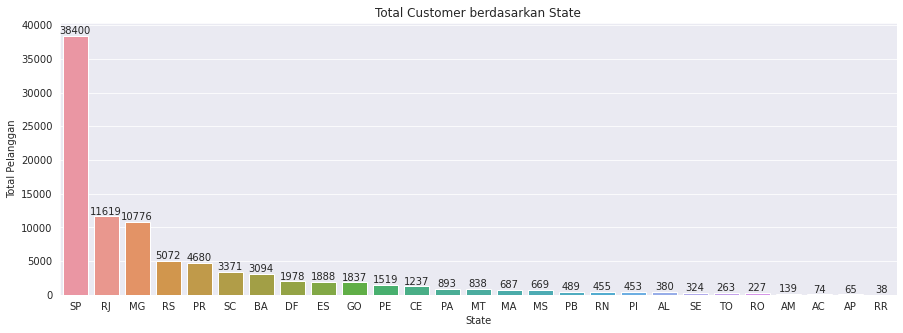

In [19]:
#Visualisasi
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = cust_state['address_state'], y = cust_state['total_customer'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total Customer berdasarkan State')
plt.xlabel('State')
plt.ylabel('Total Pelanggan')

Lokasi state dengan pelanggan terbanyak berada di SP (Sao Paolo) dengan total 38,4 ribu pelanggan. Untuk diurutan kedua ada RJ (Rio de Janeiro) dengan total 11,6 ribu pelanggan, dan urutan ketiga ada MG (Minas Gerais) dengan total 11 ribu pelanggan.

**Total customers by city**

In [21]:
#Buat grouping untuk menghitung total customer_unique_id berdasarkan address_city
cust_city = cust_no_dup.groupby('address_city')['customer_unique_id'].count().reset_index()
cust_city = cust_city.rename(columns = {'customer_unique_id' : 'total_customer'}).sort_values(by = 'total_customer', ascending = False)
cust_city

,address_city,total_customer
3551,sao paulo,14196
3116,rio de janeiro,6196
448,belo horizonte,2546
552,brasilia,1973
1133,curitiba,1411
...,...,...
2102,luiz alves,1
2099,luis correia,1
2096,lucena,1
2091,loreto,1


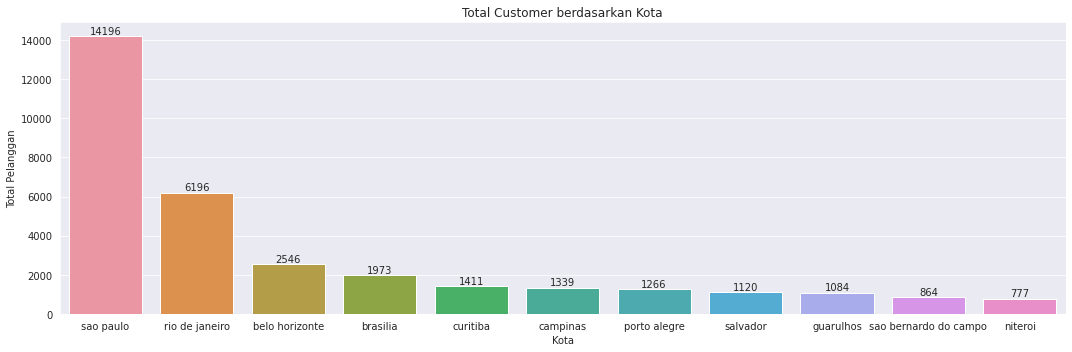

In [22]:
#Visualisasi
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = cust_city['address_city'][:11], y = cust_city['total_customer'][:11])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total Customer berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Total Pelanggan')
plt.tight_layout()

Lokasi kota dengan pelanggan terbanyak berada di sao paolo (State SP) dengan total 14,1 ribu pelanggan. Untuk diurutan kedua ada rio de janeiro (State RJ) dengan total 6,1 pelanggan, dan diurutan ketiga ada  belo horizone (State MG) dengan total 2,5 pelanggan.

Penting untuk mengetahui lokasi dari pelanggan supaya sasaran marketing bisa tepat atau jika Olist Store ingin membuat jasa pengirimannya sendiri bisa menentukan tempat-tempat pengirimannya dengan tepat.

# Customer Characteristics

**Based on order**

In [23]:
#Buat tabel mengenai total order tiap pelanggan
total_order = df.groupby('customer_unique_id')[['order_id']].count().sort_values(by = 'order_id', ascending = False).reset_index()
total_order = total_order.rename(columns = {'order_id' : 'total_order'})

#Buat kolom yang menjelaskan frekuensi order tiap pelanggan (asumsi = jika dibawah sama dengan 3 disebut sedikit, selain itu banyak)
def freq(x):
    if x <= 3:
        return 'few'
    else:
        return 'many'
total_order['order_frequency'] = total_order['total_order'].apply(freq)

In [24]:
total_order['order_frequency'].value_counts()

few     91419
many       46
Name: order_frequency, dtype: int64

Jumlah pelanggan yang memiliki frekuensi order sedikit (<= 3) sebanyak 91 ribu. Sedangkan jumlah pelanggan yang memiliki frekuensi order banyak (> 3) hanya sebanyak 46. Sebaiknya Olist dapat meningkatkan banyak pelanggan dengan frekuensi order sedikit menjadi banyak sehingga Olist memiliki banyak pelanggan loyal.

In [25]:
#Buat tabel yang menginfokan tanggal pembelian pertama tiap pelanggan
first_purchase = df.groupby(['customer_unique_id'])['order_purchase_timestamp'].min()
first_purchase = pd.DataFrame(data = first_purchase).reset_index()
first_purchase = first_purchase.rename(columns = {'order_purchase_timestamp' : 'first_purchase_date'})

#Buat tabel yang menginfokan tanggal pembelian terakhir tiap pelanggan
last_purchase = df.groupby(['customer_unique_id'])['order_purchase_timestamp'].max()
last_purchase = pd.DataFrame(data = last_purchase).reset_index()
last_purchase = last_purchase.rename(columns = {'order_purchase_timestamp' : 'last_purchase_date'})

In [27]:
last_purchase

,customer_unique_id,last_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [29]:
#Gabungkan tabel first_purchase dan last_purchase
purchase_date = pd.merge(left = first_purchase, right = last_purchase, on = 'customer_unique_id')

#Gabungkan dengan tabel total_order
purchase_date = purchase_date.merge(right = total_order, how = 'left', on = 'customer_unique_id')

#Buat kolom yang menghitung selisih last purchase date dengan first purchase date
purchase_date['delta_last_first'] = (purchase_date['last_purchase_date'] - purchase_date['first_purchase_date']).dt.days

#Buat kolom rata-rata hari tiap pelanggan melakukan 1 order
purchase_date['avg_days_1_order'] = purchase_date['delta_last_first'] / purchase_date['total_order']

#Buat kolom keaktifan pelanggan
def activity(x):
    if (x <= 120) & (x >= 1):
        return 'active'
    elif x > 120:
        return 'passive I'
    else:
        return 'passive II'
#Asumsi : semakin kecil rata-rata hari per 1 order maka semakin aktif pelanggan tersebut (active) dan sebaliknya (passive I)
#Namun jika nilai rata-rata hari per 1 order adalah 0, maka pelanggan tersebut hanya melakukan 1 kali order saja (passive II)
purchase_date['activity_status'] = purchase_date['avg_days_1_order'].apply(activity)

#Buat kolom mengenai recency tiap pelanggan
purchase_date['recency_days'] = (purchase_date['last_purchase_date'].max() - purchase_date['last_purchase_date']).dt.days

In [30]:
purchase_date['activity_status'].value_counts()

passive II    89575
active         1608
passive I       282
Name: activity_status, dtype: int64

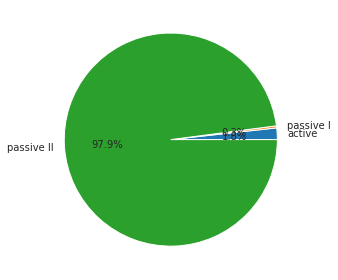

In [31]:
activity_visual = purchase_date.groupby('activity_status')['customer_unique_id'].count().reset_index()
activity_visual = activity_visual.rename(columns = {'customer_unique_id' : 'total_customer'})

plt.pie(x = activity_visual['total_customer'], labels = activity_visual['activity_status'], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Dari data diatas, dapat dilihat bahwa banyak pelanggan yang masuk kategori 'passive II' artinya banyak sekali pelanggan yang hanya melakukan order 1 kali saja hingga 97,9%. Olist perlu berusaha mencari cara supaya pelanggan kategori 'passive II' bisa berubah setidaknya menjadi 'passive I'. Karena dapat diartikan bahwa jika pelanggan tersebut hanya melakukan order 1 kali saja artinya Olist Store ini kurang dibutuhkan.

In [32]:
purchase_date['recency_days'].value_counts()

277    806
278    694
275    398
274    386
105    354
      ... 
600      7
596      5
599      5
597      4
598      4
Name: recency_days, Length: 610, dtype: int64

In [ ]:
purchase_date['recency_days'].max()

Recency menunjukan sudah berapa lama pembeli tidak melakukan order lagi sejak pembelian terakhir. Dari data diatas, dapat dilihat bahwa bahwa banyak pelanggan yang recency nya sekitar 270an hari (9 bulan). Nilai yang tertinggi ada yang hingga 694 hari. Sebaiknya Olist juga mencari cara yang menarik supaya pelanggan tersebut mulai melakukan order lagi.

**Based on the product ordered**

In [34]:
#Buat tabel grouping yang menghitung rata-rata jumlah barang yang dipesan tiap berdasarkan total pelanggan (customer_unique_id)
avg_order_item = df.groupby('customer_unique_id')[['order_item_id']].mean().sort_values(by = 'order_item_id',
                                                                                      ascending = False).reset_index()
avg_order_item = avg_order_item.rename(columns = {'order_item_id' : 'avg_item_ordered'})


def item(x):
    if x >= 5.0:
        return 'many'
    else:
        return 'few'
avg_order_item['items_order_status'] = avg_order_item['avg_item_ordered'].apply(item)

In [35]:
avg_order_item['items_order_status'].value_counts()

few     91070
many      395
Name: items_order_status, dtype: int64

Kebanyakan pelanggan dengan total 91 ribu lebih suka untuk melakukan pembelian dengan jumlah produk yang sedikit (antara 1 - 4 barang). Sedangkan yang bersedia melakukan pembelian dengan jumlah produk banyak (lebih dari 5 barang) hanya sekitar 395 pelanggan.

In [36]:
#Rata-rata berat barang
avg_weight_g = df.groupby('customer_unique_id')[['product_weight_g', 'total_order_value']].mean().reset_index()
avg_weight_g = pd.DataFrame(data = avg_weight_g)
avg_weight_g = avg_weight_g.rename(columns = {'product_weight_g' : 'avg_weight_g', 'total_order_value' : 'average_order_value'})

avg_weight_g

,customer_unique_id,avg_weight_g,average_order_value
0,0000366f3b9a7992bf8c76cfdf3221e2,1500.0,259.80
1,0000b849f77a49e4a4ce2b2a4ca5be3f,375.0,37.80
2,0000f46a3911fa3c0805444483337064,1500.0,138.00
3,0000f6ccb0745a6a4b88665a16c9f078,150.0,51.98
4,0004aac84e0df4da2b147fca70cf8255,6050.0,360.00
...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,30000.0,2720.00
91461,fffea47cd6d3cc0a88bd621562a9d061,1720.0,129.78
91462,ffff371b4d645b6ecea244b27531430a,600.0,179.80
91463,ffff5962728ec6157033ef9805bacc48,444.0,230.00


In [ ]:
#Visualisasi scatter antara weight dengan order value

Rata-rata barang pelanggan suka order beratnya kecil. Maka Olist Store bisa fokus untuk mencari jasa ekspedisi yang harga nya juga murah.

In [37]:
#Standar deviasi berat barang
std_weight_g = df.groupby('customer_unique_id')['product_weight_g'].std().reset_index()
std_weight_g = pd.DataFrame(data = std_weight_g)
std_weight_g = std_weight_g.rename(columns = {'product_weight_g' : 'std_weight_g'})
std_weight_g

,customer_unique_id,std_weight_g
0,0000366f3b9a7992bf8c76cfdf3221e2,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,NaN
2,0000f46a3911fa3c0805444483337064,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,NaN
4,0004aac84e0df4da2b147fca70cf8255,NaN
...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,NaN
91461,fffea47cd6d3cc0a88bd621562a9d061,NaN
91462,ffff371b4d645b6ecea244b27531430a,NaN
91463,ffff5962728ec6157033ef9805bacc48,NaN


In [38]:
std_weight_g['std_weight_g'].mean()

1381.1040444808996

Standar deviasi berat barang menjelaskan bahwa semakin besar angkanya, pembeli tersebut sering melakukan order dengan jumlah berat barang yang berbeda-beda. Pada berat barang ini, tidak terlalu besar perbedaannya.

Maka dari itu Olist Store bisa fokus mencari jasa ekspedisi yang pengantarannya untuk berat barang kecil itu murah harganya.

**Based on order time period**

In [39]:
#Waktu tersering melakukan order berdasarkan bulan
month_buy = df.groupby(['customer_unique_id'])['month'].max(df['month'].count()).reset_index()
month_buy = pd.DataFrame(data = month_buy).rename(columns = {'month' : 'modus_month_buy'})
month_buy['modus_month_buy'].value_counts()

8     10182
5      9773
7      9598
3      8948
6      8832
4      8603
2      7594
1      7184
11     6993
12     5276
10     4551
9      3931
Name: modus_month_buy, dtype: int64

Kebanyakan pelanggan suka untuk melakukan order pada bulan ke-8 (Agustus) kemudian bulan ke-5 (Mei), dan bulan ke-7 (Juli).

In [40]:
#Waktu tersering melakukan order berdasarkan hari
day_buy = df.groupby(['customer_unique_id'])['day_of_week'].max(df['day_of_week'].count())
day_buy = pd.DataFrame(data = day_buy).reset_index()

day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_name)
day_buy['modus_day_buy'] = day_buy['day_of_week'].map(day_name)

day_buy['modus_day_buy'].value_counts()

Monday       14623
Tuesday      14574
Wednesday    14233
Thursday     13594
Friday       13111
Sunday       11238
Saturday     10092
Name: modus_day_buy, dtype: int64

Kebanyakan pelanggan suka untuk melakukan order pada hari senin, selasa, dan rabu. Untuk perbedaannya tidak begitu jauh diantara ketiga hari tersebut.

In [41]:
#Waktu tersering melakukan order berdasarkan bagian hari
pod_buy = df.groupby(['customer_unique_id'])['hour'].max(df['hour'].count())
pod_buy = pd.DataFrame(data = pod_buy).reset_index()

def pod(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
pod_buy['modus_parts_of_day_buy'] = pod_buy['hour'].apply(pod)
pod_buy['modus_parts_of_day_buy'].value_counts()

afternoon    29585
evening      22383
morning      20303
night        19194
Name: modus_parts_of_day_buy, dtype: int64

Banyak sekali pelanggan yang suka melakukan order di sore hari (jam 12 - 17). Mungkin dikarenakan pelanggan telah selesai bekerja atau bersekolah.

Olist Store perlu mengetahui hal-hal diatas supaya nantinya jika ingin memberikan vocher atau diskon bisa dilakukan pada periode waktu yang tepat.

**Based on order value**

In [43]:
#Rata-rata total order value per order
avg_order_value = df.groupby('customer_unique_id')['total_order_value'].mean().reset_index()
avg_order_value = pd.DataFrame(data = avg_order_value).rename(columns = {'total_order_value' : 'avg_value_per_order'})

#Buat kolom yang mengelompokan rata-rata harga order tiap pelanggan
def value(x):
    if x >= 2500.00:
        return 'expensive'
    elif (x < 2500.00) & (x > 1000.00):
        return 'normal'
    else:
        return 'cheap'
#Asumsi = harga diatas 2500 disebut mahal, harga diantara 1000 - 2500 disebut normal, harga dibawah 1000 disebut murah
    
avg_order_value['value_type'] = avg_order_value['avg_value_per_order'].apply(value)

In [44]:
avg_order_value['value_type'].value_counts()

cheap        88149
normal        2754
expensive      562
Name: value_type, dtype: int64

Kebanyakan pelanggan sekitar 88,1 ribu lebih suka untuk berbelanja dengan harga yang murah (<= 1000 kebawah). Pelanggan yang suka untuk berbelanja dengan harga normal (1000 - 2500) ada sebanyak 2,7 ribu pelanggan. Sedangkan pelanggan yang suka untuk berbelanja dengan harga mahal (>= 2500) hanya sebanyak 562 pelanggan. Olist Store perlu juga untuk mempertahankan atau meningkatkan jumlah pelanggan yang membeli dengan harga normal dan mahal supaya Olist bisa mendapatkan keuntungan yang banyak.  

In [45]:
#Standar deviasi total harga order
std_order_value = df.groupby('customer_unique_id')['total_order_value'].std().reset_index()
std_order_value = pd.DataFrame(data = std_order_value).rename(columns = {'total_order_value' : 'std_value_per_order'})
std_order_value['std_value_per_order'].value_counts(dropna = False)

NaN           88759
0.000000        292
14.142136        26
28.284271        21
42.426407        15
              ...  
115.824091        1
71.983470         1
99.716198         1
21.227346         1
32.922892         1
Name: std_value_per_order, Length: 1868, dtype: int64

Standar deviasi total harga menjelaskan bahwa semakin besar angkanya, pembeli tersebut sering melakukan order dengan total harga yang berbeda-beda atau jauh dari rata-rata harganya. Diharapkan Olist Store bisa mempertahankan pelanggan yang memiliki rata-rata harga pembelian yang besar dengan standar deviasi yang kecil sehingga bisa mendapatkan keuntungan yang banyak.

**Based on payment**

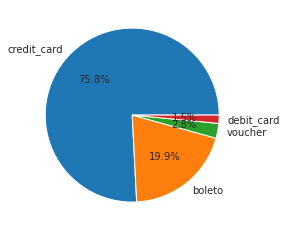

In [46]:
#Visualisasi metode pembayaran terpopuler
payment_type = df.groupby('payment_type')['order_id'].count().reset_index()
payment_type = payment_type.rename(columns = {'order_id':'total_order'}).sort_values(by = 'total_order', ascending = False)

plt.pie(x = payment_type['total_order'], labels = payment_type['payment_type'], autopct='%1.1f%%')
plt.show()

Sekitar 75.8% order menggunakan kartu kredit untuk membayar. Yang kedua dengan persentase 19.9% adalah boleto yaitu voucher cetak atau virtual dengan kode batang, detail pembayaran, dan informasi pelanggan.

In [47]:
#Buat tabel yang menginfokan preferensi tipe pembayaran tiap pelanggan
top_payment_type = df.groupby(['customer_unique_id'])['payment_type'].max(df['payment_type'].value_counts().argmax()).reset_index()
top_payment_type = pd.DataFrame(data = top_payment_type).rename(columns = {'payment_type':'preferred_payment_type'}).sort_values(by = 'preferred_payment_type', ascending = False)
top_payment_type['preferred_payment_type'].value_counts()

credit_card    69400
boleto         18098
voucher         2536
debit_card      1431
Name: preferred_payment_type, dtype: int64

Sekitar 69,4 ribu pelanggan memiliki preferensi menggunakan kartu kredit untuk pembayaran. Ini artinya bukan hanya 1 orang atau orang-orang tertentu saja yang sering menggunakan kartu kredit sehingga bisa mencapai 75.8% dari total order. Maka dari itu dapat disimpulkan bahwa orang-orang lebih suka menggunakan kartu kredit untuk pembayaran. Olist Store bisa bekerja sama dengan banyak bank untuk menentukan manfaat yang didapat jika melakukan pembayaran melalui kartu kredit sehingga pelanggan merasa senang, lalu tingkat kepuasan meningkat dan memungkinkan untuk loyal melakukan order melalui Olist.

**Based on product category**

In [48]:
#Pelanggan yang order berbagai kategori produk
multi_prod_cat = df.groupby(['customer_unique_id'])['product_category_name_english'].nunique()
multi_prod_cat = pd.DataFrame(data = multi_prod_cat).rename(
    columns = {'product_category_name_english' : 'number_product_purchase_category'}).reset_index()
multi_prod_cat['number_product_purchase_category'].value_counts()

1    89972
2     1424
3       57
4        9
5        3
Name: number_product_purchase_category, dtype: int64

Kebanyakan pelanggan dengan total 89,9 ribu hanya membeli 1 kategori produk saja. Sisanya sebanyak 1,4 ribu pelanggan telah melakukan pembelian dengan kategori produk lebih dari 1. Banyaknya pelanggan yang membeli 1 kategori produk, karena banyak pembeli yang melakukan order sebanyak 1 kali saja. Diharapkan pelanggan untuk membeli banyak kategori produk melalui Olist Store karena artinya Olist Store dapat diandalkan untuk membeli berbagai macam produk.

In [49]:
#Preferensi kategori produk tiap pelanggan
cust_prod_cat = df.groupby(['customer_unique_id'])['product_category_name_english'].max(
    df['product_category_name_english'].value_counts().argmax())

cust_prod_cat = pd.DataFrame(data = cust_prod_cat).reset_index().rename(
    columns = {'product_category_name_english' : 'preferred_product_category'})

cust_prod_cat['preferred_product_category'].value_counts()

bed_bath_table               8517
health_beauty                8326
sports_leisure               7228
computers_accessories        6226
furniture_decor              5849
                             ... 
arts_and_craftmanship          19
cds_dvds_musicals              12
la_cuisine                     11
fashion_childrens_clothes       5
security_and_services           2
Name: preferred_product_category, Length: 71, dtype: int64

Lima kategori produk yang paling diminati banyak pelanggan adalah bed bath table, health beauty, sports leisure, computer accessories, dan furniture decor. Olist Store dapat fokus kepada 5 kategori produk tersebut supaya pelanggan loyal untuk mencari produk tersebut melalui Olist Store dengan menambah seller bagus atau vocher untuk pembelian kategori produk tersebut.

# Top Product Category

In [63]:
#Buat tabel kategori paling banyak diorder tiap tahun
prod_cat = df.groupby(['address_state', 'product_category_name_english', 'year'])['order_id'].count().reset_index()
prod_cat = prod_cat.rename(columns = {'order_id':'total_order'}).sort_values(by = 'total_order', ascending = False)
prod_cat

,address_state,product_category_name_english,year,total_order
2243,SP,bed_bath_table,2018,2422
2326,SP,health_beauty,2018,2420
2242,SP,bed_bath_table,2017,1850
2375,SP,sports_leisure,2018,1784
2259,SP,computers_accessories,2018,1664
...,...,...,...,...
1900,RR,office_furniture,2018,1
1901,RR,perfumery,2018,1
1902,RR,sports_leisure,2017,1
988,MS,costruction_tools_garden,2017,1


In [65]:
#Buat tabel untuk melihat perkembangan kategori produk yang dipesan dari tahun 2016 - 2018
prod_cat = df.groupby(['address_state', 'product_category_name_english', 'year'])['order_id'].count().reset_index()
prod_cat = prod_cat.rename(columns = {'order_id':'total_order'}).sort_values(by = 'total_order', ascending = False)

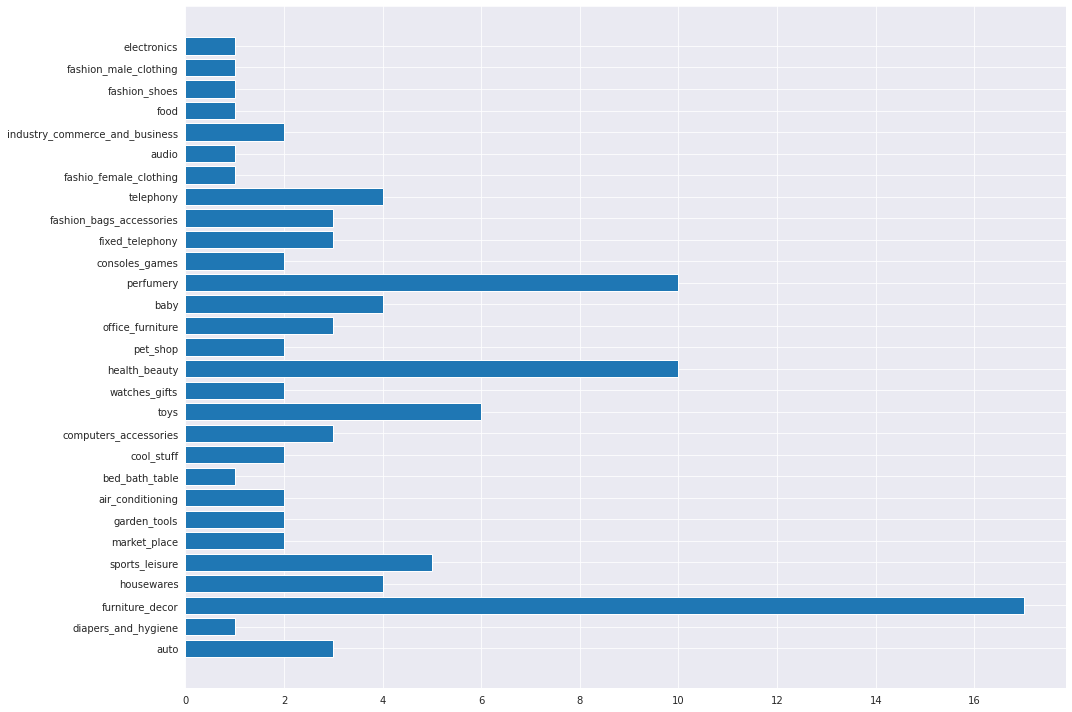

In [66]:
#Tahun 2016
prod_cat_2016 = prod_cat[prod_cat['year'] == 2016].sort_values(by = 'total_order', ascending = True)

#Visualisasi
plt.figure(figsize=(15,10))
plt.barh(prod_cat_2016['product_category_name_english'], prod_cat_2016['total_order'])
plt.tight_layout()

Pada tahun 2016, tiga kategori produk yang paling diminati adalah furniture_decor, perfumery, health_beauty

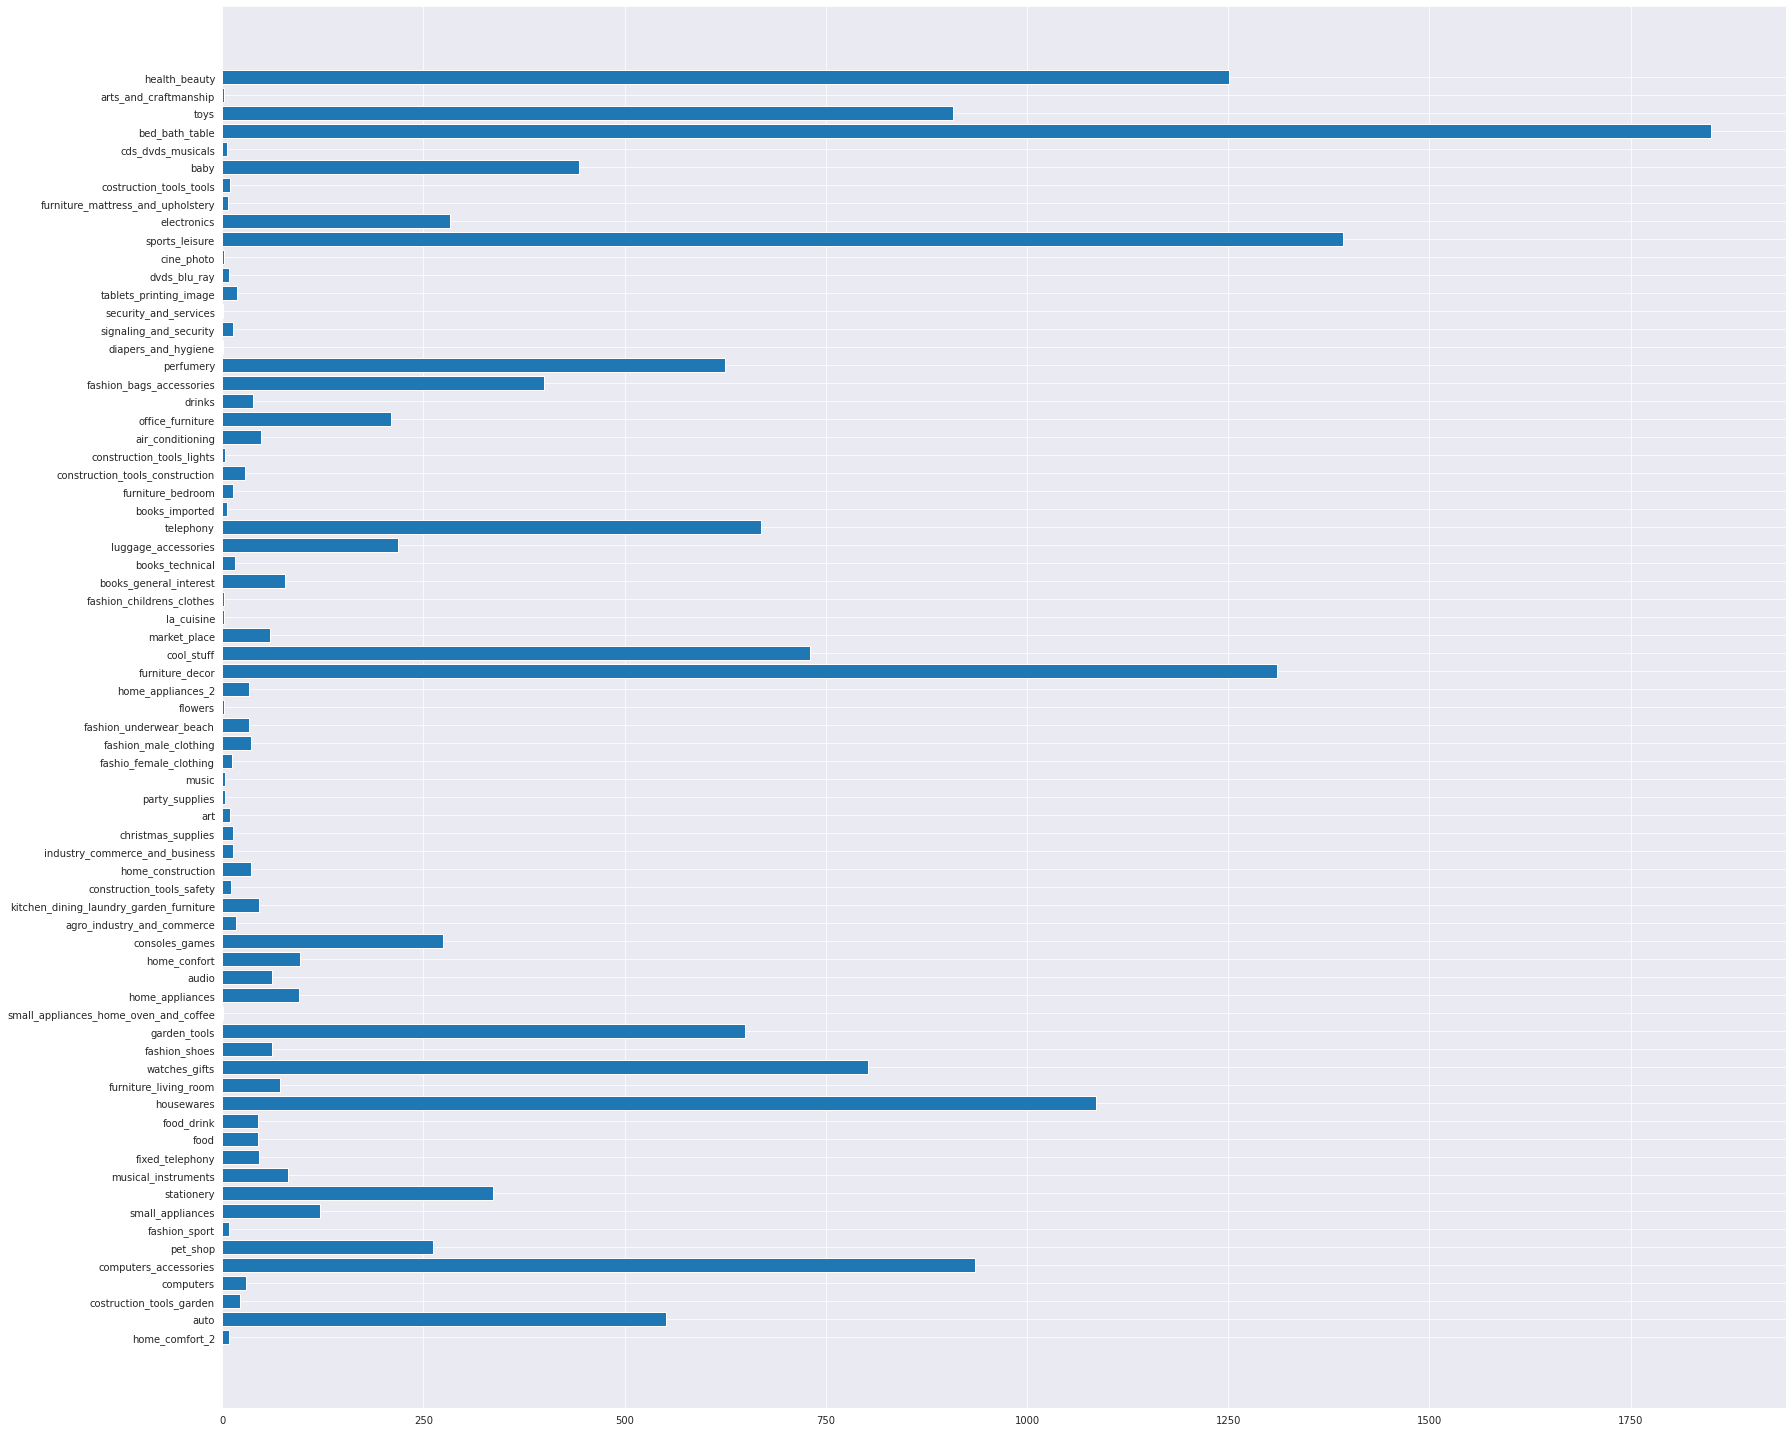

In [67]:
#Tahun 2017
prod_cat_2017 = prod_cat[prod_cat['year'] == 2017].sort_values(by = 'total_order', ascending = True)

#Visualisasi
plt.figure(figsize=(25, 20))
plt.barh(prod_cat_2017['product_category_name_english'], prod_cat_2017['total_order'])
plt.tight_layout()

Pada tahun 2017, tiga kategori produk yang paling diminati adalah bed_bath_table, sports_leisure, dan furniture_decor

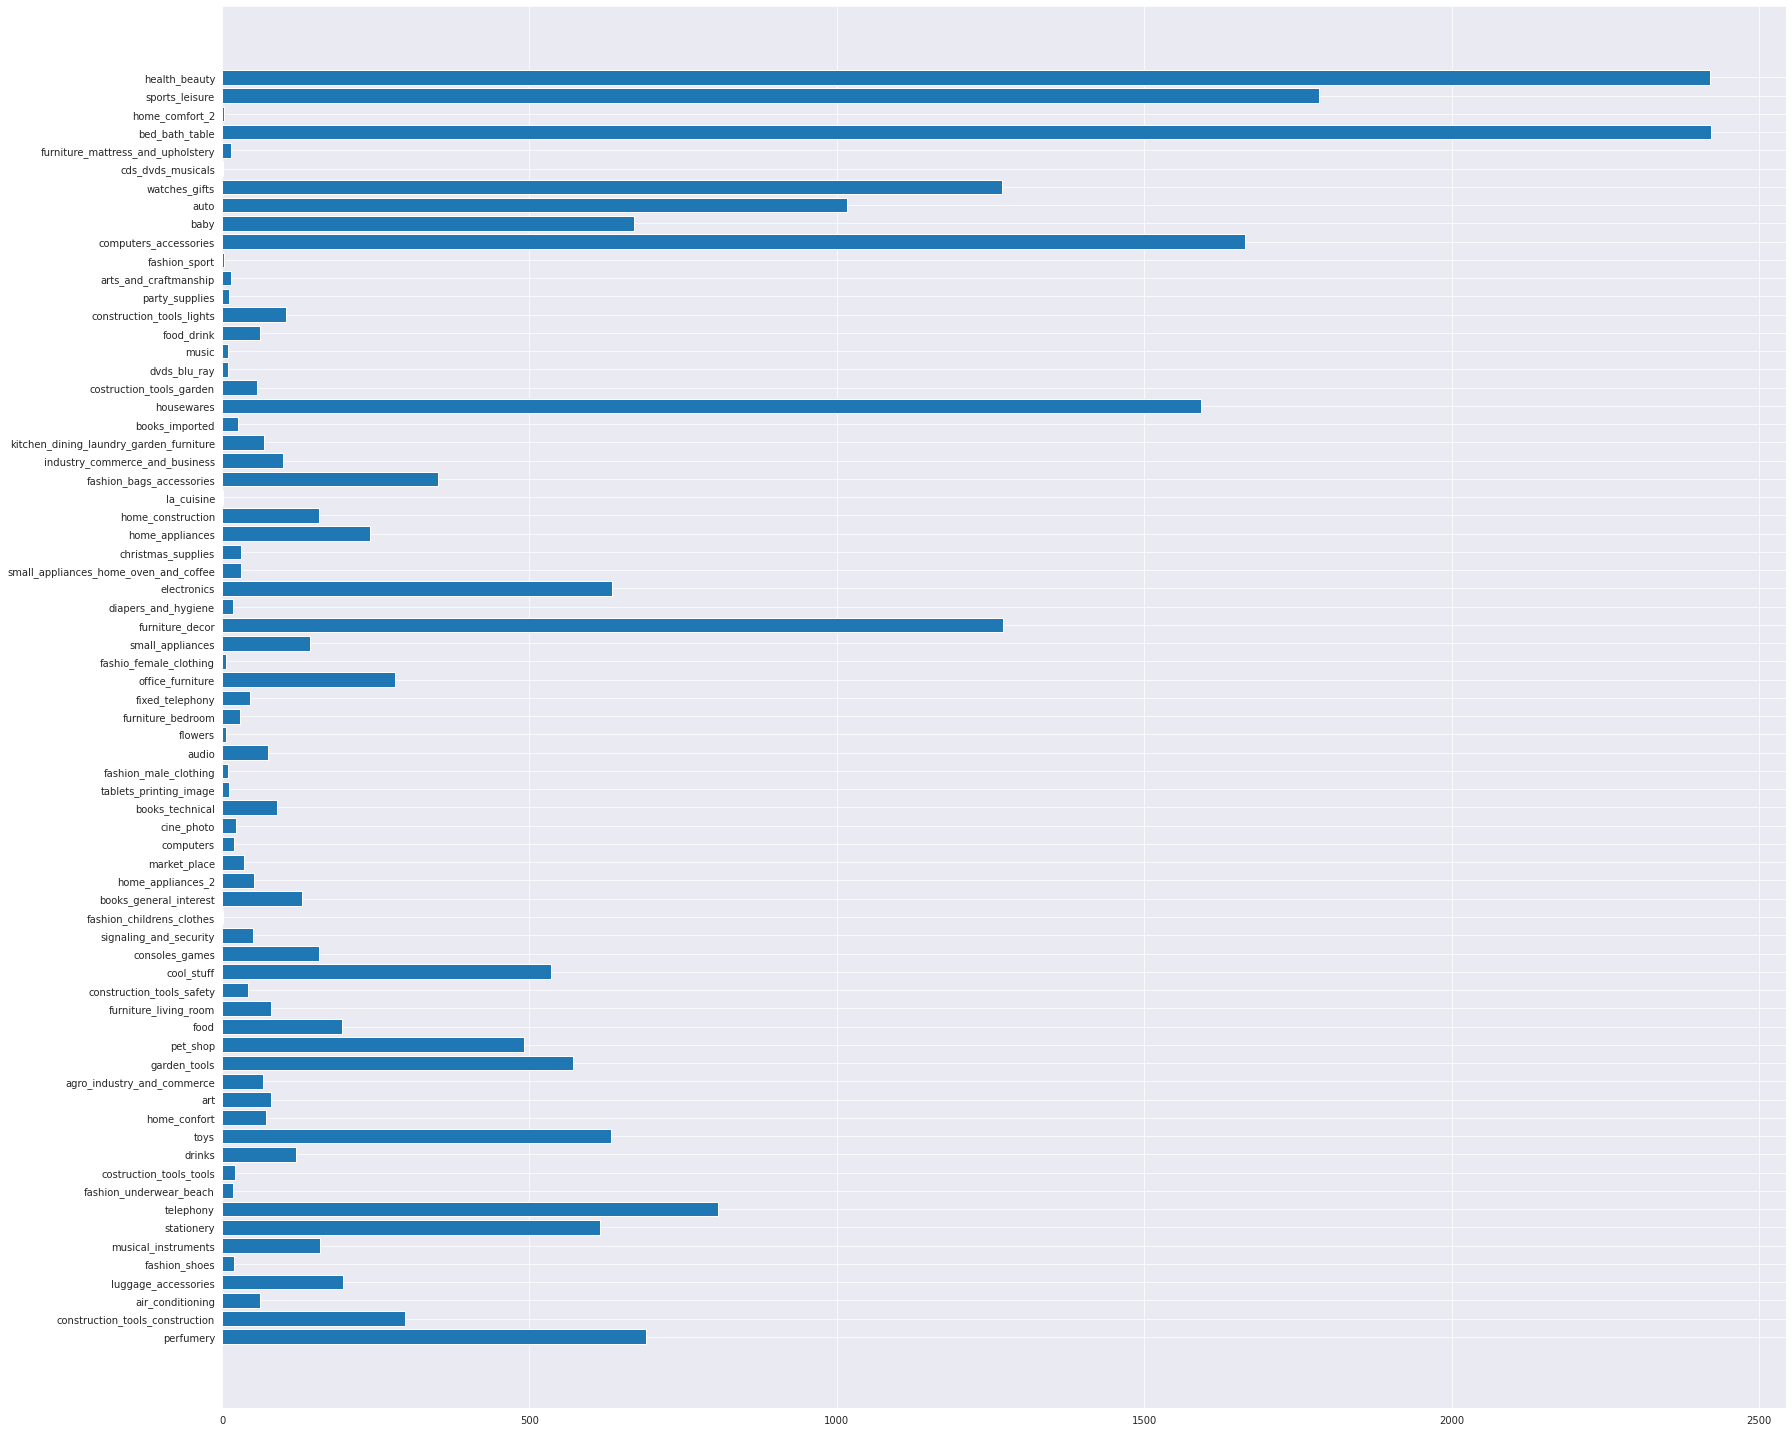

In [68]:
#Tahun 2018
prod_cat_2018 = prod_cat[prod_cat['year'] == 2018].sort_values(by = 'total_order', ascending = True)

#Visualisasi
plt.figure(figsize=(25, 20))
plt.barh(prod_cat_2018['product_category_name_english'], prod_cat_2018['total_order'])
plt.tight_layout()

Pada tahun 2018, tiga kategori produk yang paling diminati adalah bed_bath_table, health_beauty, dan sports_leisure

In [70]:
#Melihat perkembangan jumlah order tiap kategori produk
print('product_category', 'growth2018_2017', 'growth2017_2016')
for i in df['product_category_name_english'].unique():
    x = df[(df['year'] == 2018) & (df['product_category_name_english'] == i)]['order_id'].count()
    y = df[(df['year'] == 2017) & (df['product_category_name_english'] == i)]['order_id'].count()
    z = df[(df['year'] == 2016) & (df['product_category_name_english'] == i)]['order_id'].count()
    growth_2017_2018 = x - y
    growth_2018_2019 = y - z
    print(i, growth_2017_2018, growth_2018_2019)

product_category growth2018_2017 growth2017_2016
health_beauty 1981 3240
computers_accessories 1424 2508
furniture_decor 19 2991
garden_tools -426 1900
telephony 139 1949
housewares 952 2338
baby 446 1133
watches_gifts 1324 2049
bed_bath_table 442 4317
office_furniture 21 601
drinks 143 70
construction_tools_construction 527 99
furniture_living_room 5 196
electronics 886 798
fixed_telephony -32 112
cool_stuff -754 2110
sports_leisure 430 3485
air_conditioning 25 102
pet_shop 319 672
home_construction 260 106
auto 1034 1354
construction_tools_lights 198 17
fashion_bags_accessories -172 977
christmas_supplies 29 47
consoles_games -268 626
market_place -80 165
perfumery -153 1568
signaling_and_security 72 32
toys -1007 2345
small_appliances 19 290
agro_industry_and_commerce 81 48
stationery 461 888
construction_tools_safety 91 31
fashion_underwear_beach -44 80
food_drink 14 103
food 232 99
luggage_accessories -90 550
costruction_tools_garden 65 61
fashion_shoes -96 162
fashio_female_cloth

Berdasarkan data dan 3 grafik diatas, menurut saya kategori produk yang paling bagus adalah health_beauty. Produk bed_bath_table memang hebat karena bisa konsisten menjadi produk terlaris tahun 2017 dan 2018, namun saya memilih produk health_beauty karena memiliki perkembangan yang luar biasa. Untuk produk health_beauty, perkembangan dari tahun 2017 ke 2018 merupakan yang terbesar dengan jumlah 1981 sedangkan produk bed_bath_table hanya meningkat sebanyak 442. Untuk perkembangan dari tahun 2016 ke 2017, produk health_beauty merupakan yang terbesar ketiga setelah bed_bath_table dan sports_leisure. Hingga saat ini (2018), produk dari health_beauty sudah bisa menyamai jumlah produk bed_bath_table. Diperkirakan tahun-tahun selanjutnya, jumlah order produk health_beauty mampu menjadi yang terbanyak dari kategori produk lainnya.

Alasan lain produk health beauty bisa meningkat banyak karena Brazil sendiri terkenal karena orang-orangnya banyak memberikan perhatian khusus pada penampilan fisiknya. Brazil juga menempati salah satu peringkat terbesar pasar kosmetik dunia dan menjadi yang paling penting di daerah Amerika Latin. Maka dari itu, cukup penting bagi Olist Store untuk memperhatikan kategori produk health beauty.

In [71]:
#Pembelian produk kategori health beauty tiap customer
health_beauty_order = df[df['product_category_name_english'] == 'health_beauty'].groupby('customer_unique_id')['order_item_id'].sum()
health_beauty_order = health_beauty_order.reset_index().rename(columns = {'order_item_id' : 'health_beauty_total_order'})
health_beauty_order['health_beauty_total_order'].value_counts()

1     7685
2      608
3       78
4       30
5       16
6        9
21       1
Name: health_beauty_total_order, dtype: int64

Dari data diatas, dapat diketahui bahwa tidak hanya beberapa orang saja yang membeli banyak produk health beauty, namun banyak orang. Pembelian terbanyak untuk produk health beauty ada sebanyak 21 barang.

# Customer Reviews

In [72]:
#Rata-rata skor review tiap pelanggan
avg_score = df.groupby('customer_unique_id')['review_score'].mean().reset_index()
avg_score = avg_score.rename(columns = {'review_score' : 'average_score'})

#Buat kolom tingkat kepuasan tiap pelanggan
def satisfaction(x):
    if (x <= 5.0) & (x >= 4.0):
        return 'satisfied'
    else:
        return 'dissatisfied'
#Asumsi = skor 4 & 5 puas, selain itu tidak puas

avg_score['satisfaction_level'] = avg_score['average_score'].apply(satisfaction)
avg_score['satisfaction_level'].value_counts()

satisfied       72032
dissatisfied    19433
Name: satisfaction_level, dtype: int64

Asumsi : Satisfied = skor review 4 atau 5, Dissatisfied = skor review 1, 2, atau 3

Sekitar 72 ribu pelanggan yang merasa puas dengan pengalaman pembeliannya. Ini tentunya menunjukan hal yang bagus karena kepuasan yang tinggi akan memungkinkan orang tersebut untuk melakukan order lagi melalui Olist Store. Sedangkan untuk yang tidak puas ada sekitar 19,4 ribu pelanggan. Memang lebih banyak pelanggan yang merasa puas, namun lebih baik Olist juga menangani pelanggan yang kurang puas supaya sering melakukan order lagi melalui Olist Store.

In [74]:
#Rasio transaksi reviewed
#Pilih pelanggan yang mengisi ulasan judul dan pesan
df_rev = df[(df['review_comment_title'] != 'no comment title') & (df['review_comment_message'] != 'no comment message')]

#Buat tabel untuk menghitung total ulasan tiap pelanggan
cust_tot_rev = df_rev.groupby('customer_unique_id')['review_comment_title'].count().reset_index()
cust_tot_rev = cust_tot_rev.rename(columns = {'review_comment_title' : 'total_order_in_review'})

#Gabungkan dengan tabel total_order
new_total_order = pd.merge(left = total_order,right = cust_tot_rev, how = 'left', on = 'customer_unique_id')

#Buat kolom rasio review per transaksi tiap pelanggan
new_total_order['ratio_trx_reviewed'] = new_total_order['total_order_in_review'] / new_total_order['total_order']

In [75]:
print(new_total_order.info())

print(new_total_order['ratio_trx_reviewed'].value_counts(dropna = False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91465 entries, 0 to 91464
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_unique_id     91465 non-null  object 
 1   total_order            91465 non-null  int64  
 2   order_frequency        91465 non-null  object 
 3   total_order_in_review  9331 non-null   float64
 4   ratio_trx_reviewed     9331 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.2+ MB
None
NaN         82134
1.000000     9035
0.500000      265
0.333333       16
0.666667       10
0.250000        2
0.200000        1
0.400000        1
0.750000        1
Name: ratio_trx_reviewed, dtype: int64


Rasio ulasan per transaksi menjelaskan seberapa banyak pelanggan mengisi survei kepuasan per ordernya. Dari data diatas, cukup disayangkan karena banyak sekali pelanggan yang tidak mengisi ulasan baik itu judul dan pesan, jika ditotal ada sebanyak 82 ribu pelanggan yang tidak mengisi. Ini cukup merugikan Olist Store secara langsung karena Olist Store tidak mengetahui pengalaman pelanggan dengan lebih luas sehingga akan kurang mendapatkan informasi mengenai pengalaman positif apa yang perlu dipertahankan atau pengalaman negatif apa yang perlu diperbaiki. Jumlah review yang sedikit juga akan membuat Olist sulit untuk menarik lebih banyak orang lagi supaya menggunakan Olist Store ketika berbelanja. Untuk total yang mengisi hanya sebanyak 9,3 ribu pelanggan saja dan nilai rasio yang didapat bervariasi. Maksimal nilai rasio yang ditemukan adalah 1 dan banyak sekali pelanggan yang mendapat rasio 1 hingga 9 ribu pelanggan. 

In [76]:
#Peningkatan skor review 1 tahun tiap pelanggan
growth_score = df.pivot_table(values = 'review_score', index = 'customer_unique_id', columns = 'year', aggfunc = 'sum')
growth_score.reset_index(inplace = True)
growth_score.rename_axis(None, axis=1, inplace = True)

#Buat kolom peningkatan skor review dari tahun 2017 hingga 2018
growth_score['growth_score_1y_%'] = (growth_score[2018] - growth_score[2017]) / growth_score[2017]

def growth(x):
    if x > 0:
        return 'increase'
    elif (x == 0):
        return 'no changes'
    elif x < 0:
        return 'decrease'
    else:
        return 'no data'
growth_score['growth_status'] = growth_score['growth_score_1y_%'].apply(growth)
growth_score['growth_status'].value_counts()                                                                               

no data       90851
no changes      293
decrease        167
increase        154
Name: growth_status, dtype: int64

Asumsi : 'no data' jika data NaN, 'no changes' jika tidak ada perubahan skor review dari 2017 ke 2018, 'decrease' jika skor review tahun 2018 menurun dari tahun 2017, 'increase' jika skor review tahun 2018 meningkat dari tahun 2017.

Dari temuan sebelumnya, banyak sekali pelanggan yang puas menggunakan Olist Store hingga 72 ribu pelanggan. Namun ternyata, dari data diatas menginfokan bahwa banyak pelanggan yang total skor reviewnya menurun dari tahun 2017 ke 2018 dengan total 167 pelanggan. Sedangkan, total skor review yang meningkat dari tahun 2017 ke 2018 hanya sebanyak 154 pelanggan saja. Ini perlu menjadi perhatian khusus bagi Olist Store, karena jika dibiarkan saja akan semakin banyak pelanggan yang skor reviewnya menurun dan nilai turunnya juga semakin besar.

In [77]:
#Persentase kepuasan & tidak puas tiap pelanggan

#Total skor review tiap pelanggan
total_review_score = df.groupby('customer_unique_id')['review_score'].count().reset_index()
total_review_score = total_review_score.rename(columns = {'review_score' : 'total_score'})

#Total skor review positif tiap customer (4, 5)
positive_score = [4, 5]
positive_review_score = df[df['review_score'].isin(positive_score)].groupby('customer_unique_id')['review_score'].count().reset_index()
positive_review_score = positive_review_score.rename(columns = {'review_score' : 'total_positive_score'})

#Total skor review negatif tiap customer (1, 2, 3)
negative_score = [1, 2, 3]
negative_review_score = df[df['review_score'].isin(negative_score)].groupby('customer_unique_id')['review_score'].count().reset_index()
negative_review_score = negative_review_score.rename(columns = {'review_score' : 'total_negative_score'})

In [78]:
#Gabungkan tabel total skor review dengan tabel skor review bagus dan skor review buruk
total_review_score = total_review_score.merge(right = positive_review_score, how = 'left', on = 'customer_unique_id')
total_review_score = total_review_score.merge(right = negative_review_score, how = 'left', on = 'customer_unique_id')

#Buat kolom rasio skor review bagus dan skor review buruk
total_review_score['ratio_positive_score'] = total_review_score['total_positive_score'] / total_review_score['total_score']
total_review_score['ratio_negative_score'] = total_review_score['total_negative_score'] / total_review_score['total_score']

In [79]:
#Melihat pelanggan (yang pernah mengisi skor positif dan skor negatif) dengan rasio skor positif diatas rasio skor negatif
total_review_score[total_review_score['ratio_positive_score'] > total_review_score['ratio_negative_score']]

,customer_unique_id,total_score,total_positive_score,total_negative_score,ratio_positive_score,ratio_negative_score
6786,12d8b5ed661190a3a08183644dfc504d,4,3.0,1.0,0.750000,0.250000
10241,1c628081cb579ed6035b9aa8614e69f4,3,2.0,1.0,0.666667,0.333333
10702,1da09dd64e235e7c2f29a4faff33535c,3,2.0,1.0,0.666667,0.333333
13620,25f3cf83109f636d52d288fa4e797111,3,2.0,1.0,0.666667,0.333333
18905,34b0cd95480e55c2a701293a2b9671b3,3,2.0,1.0,0.666667,0.333333
19361,35ecdf6858edc6427223b64804cf028e,5,4.0,1.0,0.800000,0.200000
22175,3de0c9303f39b7ccfe69ca11aee19cc6,3,2.0,1.0,0.666667,0.333333
27097,4bbaf6f7a10a7e26a8777aa5cb6d5864,3,2.0,1.0,0.666667,0.333333
27970,4e1cce07cd5937c69dacac3c8b13d965,3,2.0,1.0,0.666667,0.333333
31092,56c8638e7c058b98aae6d74d2dd6ea23,5,4.0,1.0,0.800000,0.200000


In [80]:
#Melihat pelanggan (yang pernah mengisi skor positif dan skor negatif) dengan rasio skor positif dibawah rasio skor negatif
total_review_score[total_review_score['ratio_positive_score'] < total_review_score['ratio_negative_score']]

,customer_unique_id,total_score,total_positive_score,total_negative_score,ratio_positive_score,ratio_negative_score
3790,0a609db8d244100909a15d65eadf8539,3,1.0,2.0,0.333333,0.666667
22328,3e43e6105506432c953e165fb2acf44c,9,1.0,8.0,0.111111,0.888889
24820,455c17b35969ca198c17f2fc9e8eba1b,3,1.0,2.0,0.333333,0.666667
28527,4facc2e6fbc2bffab2fea92d2b4aa7e4,4,1.0,3.0,0.250000,0.750000
35155,6204c4e582a95b6a350adf6988623bfb,3,1.0,2.0,0.333333,0.666667
39889,6f64406ed5cfa4a2d9bd35e91bfd6587,3,1.0,2.0,0.333333,0.666667
51719,90f323e9f0948ddd96c6f6a8ecc75830,3,1.0,2.0,0.333333,0.666667
54248,97bc08e526795b17e1d4f642f77ae304,3,1.0,2.0,0.333333,0.666667
54411,9832ae2f7d3e5fa4c7a1a06e9551bc61,3,1.0,2.0,0.333333,0.666667
58301,a3021c629bd1d99347a8e75a9ab035d8,3,1.0,2.0,0.333333,0.666667


Dari 2 data diatas, dapat diketahui bahwa untuk pelanggan yang pernah mengisi skor review positif dan negatif, jumlah pelanggan dengan rasio positif lebih banyak daripada jumlah pelanggan dengan rasio negatif. Ini artinya menunjukan pengalaman penlanggan lebih banyak yang positif.

# Final Data Frame

The following tables have been created

In [81]:
cust_state_city = cust_no_dup[['customer_unique_id', 'address_state', 'address_city']]
cust_state_city.head()

,customer_unique_id,address_state,address_city
69745,4546caea018ad8c692964e3382debd19,SP,sao paulo
22732,c402f431464c72e27330a67f7b94d4fb,SP,sao paulo
39142,0f5ac8d5c31de21d2f25e24be15bbffb,PR,uniao da vitoria
74213,11f97da02237a49c8e783dfda6f50e8e,GO,goiania
60724,f7ea4eef770a388bd5b225acfc546604,SP,indaiatuba


In [82]:
purchase_date.head()

,customer_unique_id,first_purchase_date,last_purchase_date,total_order,order_frequency,delta_last_first,avg_days_1_order,activity_status,recency_days
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,few,0,0.0,passive II,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,few,0,0.0,passive II,114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,few,0,0.0,passive II,536
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,few,0,0.0,passive II,320
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,few,0,0.0,passive II,287


In [83]:
avg_order_item.head()

,customer_unique_id,avg_item_ordered,items_order_status
0,4546caea018ad8c692964e3382debd19,21.0,many
1,c402f431464c72e27330a67f7b94d4fb,20.0,many
2,11f97da02237a49c8e783dfda6f50e8e,15.0,many
3,31e412b9fb766b6794724ed17a41dfa6,14.0,many
4,f7ea4eef770a388bd5b225acfc546604,14.0,many


In [84]:
month_buy.head()

,customer_unique_id,modus_month_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5
2,0000f46a3911fa3c0805444483337064,3
3,0000f6ccb0745a6a4b88665a16c9f078,10
4,0004aac84e0df4da2b147fca70cf8255,11


In [85]:
day_buy.head()

,customer_unique_id,day_of_week,modus_day_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,3,Thursday
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,Monday
2,0000f46a3911fa3c0805444483337064,4,Friday
3,0000f6ccb0745a6a4b88665a16c9f078,3,Thursday
4,0004aac84e0df4da2b147fca70cf8255,1,Tuesday


In [86]:
pod_buy.head()

,customer_unique_id,hour,modus_parts_of_day_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,10,morning
1,0000b849f77a49e4a4ce2b2a4ca5be3f,11,morning
2,0000f46a3911fa3c0805444483337064,21,night
3,0000f6ccb0745a6a4b88665a16c9f078,20,evening
4,0004aac84e0df4da2b147fca70cf8255,19,evening


In [87]:
new_avg_weight_g = avg_weight_g.drop('average_order_value', axis = 1)
new_avg_weight_g.head()

,customer_unique_id,avg_weight_g
0,0000366f3b9a7992bf8c76cfdf3221e2,1500.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,375.0
2,0000f46a3911fa3c0805444483337064,1500.0
3,0000f6ccb0745a6a4b88665a16c9f078,150.0
4,0004aac84e0df4da2b147fca70cf8255,6050.0


In [88]:
std_weight_g.head()

,customer_unique_id,std_weight_g
0,0000366f3b9a7992bf8c76cfdf3221e2,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,NaN
2,0000f46a3911fa3c0805444483337064,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,NaN
4,0004aac84e0df4da2b147fca70cf8255,NaN


In [89]:
avg_order_value.head()

,customer_unique_id,avg_value_per_order,value_type
0,0000366f3b9a7992bf8c76cfdf3221e2,259.80,cheap
1,0000b849f77a49e4a4ce2b2a4ca5be3f,37.80,cheap
2,0000f46a3911fa3c0805444483337064,138.00,cheap
3,0000f6ccb0745a6a4b88665a16c9f078,51.98,cheap
4,0004aac84e0df4da2b147fca70cf8255,360.00,cheap


In [90]:
std_order_value.head()

,customer_unique_id,std_value_per_order
0,0000366f3b9a7992bf8c76cfdf3221e2,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,NaN
2,0000f46a3911fa3c0805444483337064,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,NaN
4,0004aac84e0df4da2b147fca70cf8255,NaN


In [91]:
top_payment_type.head()

,customer_unique_id,preferred_payment_type
23801,428527b5e7151a74d2d1c4220e92d385,voucher
32620,5af0a112b6c95817cd7776d948c15df1,voucher
52758,93cfbea9c4088e38372dd1d97b7e9c97,voucher
10151,1c2165e897de19629beafbd6b5397f9f,voucher
39261,6d926e9efad646e5c90cc7cb6f57f6a0,voucher


In [92]:
multi_prod_cat.head()

,customer_unique_id,number_product_purchase_category
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [93]:
cust_prod_cat.head()

,customer_unique_id,preferred_product_category
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty
2,0000f46a3911fa3c0805444483337064,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,telephony
4,0004aac84e0df4da2b147fca70cf8255,telephony


In [94]:
health_beauty_order.head()

,customer_unique_id,health_beauty_total_order
0,0000b849f77a49e4a4ce2b2a4ca5be3f,1
1,000a5ad9c4601d2bbdd9ed765d5213b3,1
2,0014a5a58da615f7b01a4f5e194bf5ea,1
3,00293787e2aec37a9c253b63fdfe2049,2
4,002ae492472e45ad6ebeb7a625409392,2


In [95]:
avg_score.head()

,customer_unique_id,average_score,satisfaction_level
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,satisfied
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,satisfied
2,0000f46a3911fa3c0805444483337064,3.0,dissatisfied
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,satisfied
4,0004aac84e0df4da2b147fca70cf8255,5.0,satisfied


In [96]:
new_total_order2 = new_total_order.drop(['total_order', 'order_frequency'], axis = 1)
new_total_order2.head()

,customer_unique_id,total_order_in_review,ratio_trx_reviewed
0,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,NaN
1,3e43e6105506432c953e165fb2acf44c,NaN,NaN
2,ca77025e7201e3b30c44b472ff346268,NaN,NaN
3,1b6c7548a2a1f9037c1fd3ddfed95f33,NaN,NaN
4,6469f99c1f9dfae7733b25662e7f1782,NaN,NaN


In [97]:
growth_score.head()

,customer_unique_id,2016,2017,2018,growth_score_1y_%,growth_status
0,0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,5.0,NaN,no data
1,0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,4.0,NaN,no data
2,0000f46a3911fa3c0805444483337064,NaN,3.0,NaN,NaN,no data
3,0000f6ccb0745a6a4b88665a16c9f078,NaN,4.0,NaN,NaN,no data
4,0004aac84e0df4da2b147fca70cf8255,NaN,5.0,NaN,NaN,no data


In [98]:
total_review_score.head()

,customer_unique_id,total_score,total_positive_score,total_negative_score,ratio_positive_score,ratio_negative_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,NaN,1.0,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,NaN,1.0,NaN
2,0000f46a3911fa3c0805444483337064,1,NaN,1.0,NaN,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1.0,NaN,1.0,NaN
4,0004aac84e0df4da2b147fca70cf8255,1,1.0,NaN,1.0,NaN


In [100]:
#Gabungkan semua tabel yang sudah dibuat
final_df = pd.merge(left = cust_state_city, right = purchase_date, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = avg_order_item, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = month_buy, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = day_buy, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = pod_buy, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = new_avg_weight_g, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = std_weight_g, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = avg_order_value, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = std_order_value, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = top_payment_type, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = multi_prod_cat, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = cust_prod_cat, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = health_beauty_order, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = avg_score, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = new_total_order2, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = growth_score, how = 'left', on = 'customer_unique_id')
final_df = final_df.merge(right = total_review_score, how = 'left', on = 'customer_unique_id')
final_df

,customer_unique_id,address_state,address_city,first_purchase_date,last_purchase_date,total_order,order_frequency,delta_last_first,avg_days_1_order,activity_status,...,2016,2017,2018,growth_score_1y_%,growth_status,total_score,total_positive_score,total_negative_score,ratio_positive_score,ratio_negative_score
0,4546caea018ad8c692964e3382debd19,SP,sao paulo,2017-07-16 18:19:25,2017-07-16 18:19:25,1,few,0,0.0,passive II,...,NaN,1.0,NaN,NaN,no data,1,NaN,1.0,NaN,1.0
1,c402f431464c72e27330a67f7b94d4fb,SP,sao paulo,2018-02-22 15:30:41,2018-02-22 15:30:41,1,few,0,0.0,passive II,...,NaN,NaN,1.0,NaN,no data,1,NaN,1.0,NaN,1.0
2,0f5ac8d5c31de21d2f25e24be15bbffb,PR,uniao da vitoria,2017-11-23 20:30:52,2017-11-27 12:57:35,2,few,3,1.5,active,...,NaN,10.0,NaN,NaN,no data,2,2.0,NaN,1.0,NaN
3,11f97da02237a49c8e783dfda6f50e8e,GO,goiania,2017-01-30 21:44:49,2017-01-30 21:44:49,1,few,0,0.0,passive II,...,NaN,5.0,NaN,NaN,no data,1,1.0,NaN,1.0,NaN
4,f7ea4eef770a388bd5b225acfc546604,SP,indaiatuba,2018-02-21 11:45:07,2018-02-21 11:45:07,1,few,0,0.0,passive II,...,NaN,NaN,1.0,NaN,no data,1,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91460,bd4d35a669a4f67ab2f63ad6c96bf34f,SP,mirassol,2017-07-20 18:23:05,2017-07-20 18:23:05,1,few,0,0.0,passive II,...,NaN,4.0,NaN,NaN,no data,1,1.0,NaN,1.0,NaN
91461,21e6ec6ccd68df56494e410d876122bc,BA,seabra,2018-02-10 15:45:25,2018-02-10 15:45:25,1,few,0,0.0,passive II,...,NaN,NaN,5.0,NaN,no data,1,1.0,NaN,1.0,NaN
91462,fceeca5395427e515376a7c3294ae3d1,PE,jaboatao dos guararapes,2017-12-26 11:05:29,2017-12-26 11:05:29,1,few,0,0.0,passive II,...,NaN,5.0,NaN,NaN,no data,1,1.0,NaN,1.0,NaN
91463,55f9cc0d647cdf920b02786fd25437db,RJ,petropolis,2018-08-21 10:58:08,2018-08-21 10:58:08,1,few,0,0.0,passive II,...,NaN,NaN,5.0,NaN,no data,1,1.0,NaN,1.0,NaN


**Drop columns**

In [101]:
final_df.drop(['day_of_week', 'hour', 2016, 2017, 2018, 'total_score', 'total_positive_score', 'total_negative_score'], axis = 1, inplace = True)

In [102]:
final_df

,customer_unique_id,address_state,address_city,first_purchase_date,last_purchase_date,total_order,order_frequency,delta_last_first,avg_days_1_order,activity_status,...,preferred_product_category,health_beauty_total_order,average_score,satisfaction_level,total_order_in_review,ratio_trx_reviewed,growth_score_1y_%,growth_status,ratio_positive_score,ratio_negative_score
0,4546caea018ad8c692964e3382debd19,SP,sao paulo,2017-07-16 18:19:25,2017-07-16 18:19:25,1,few,0,0.0,passive II,...,health_beauty,21.0,1.0,dissatisfied,NaN,NaN,NaN,no data,NaN,1.0
1,c402f431464c72e27330a67f7b94d4fb,SP,sao paulo,2018-02-22 15:30:41,2018-02-22 15:30:41,1,few,0,0.0,passive II,...,computers_accessories,NaN,1.0,dissatisfied,NaN,NaN,NaN,no data,NaN,1.0
2,0f5ac8d5c31de21d2f25e24be15bbffb,PR,uniao da vitoria,2017-11-23 20:30:52,2017-11-27 12:57:35,2,few,3,1.5,active,...,furniture_decor,NaN,5.0,satisfied,NaN,NaN,NaN,no data,1.0,NaN
3,11f97da02237a49c8e783dfda6f50e8e,GO,goiania,2017-01-30 21:44:49,2017-01-30 21:44:49,1,few,0,0.0,passive II,...,garden_tools,NaN,5.0,satisfied,NaN,NaN,NaN,no data,1.0,NaN
4,f7ea4eef770a388bd5b225acfc546604,SP,indaiatuba,2018-02-21 11:45:07,2018-02-21 11:45:07,1,few,0,0.0,passive II,...,telephony,NaN,1.0,dissatisfied,NaN,NaN,NaN,no data,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91460,bd4d35a669a4f67ab2f63ad6c96bf34f,SP,mirassol,2017-07-20 18:23:05,2017-07-20 18:23:05,1,few,0,0.0,passive II,...,bed_bath_table,NaN,4.0,satisfied,NaN,NaN,NaN,no data,1.0,NaN
91461,21e6ec6ccd68df56494e410d876122bc,BA,seabra,2018-02-10 15:45:25,2018-02-10 15:45:25,1,few,0,0.0,passive II,...,bed_bath_table,NaN,5.0,satisfied,NaN,NaN,NaN,no data,1.0,NaN
91462,fceeca5395427e515376a7c3294ae3d1,PE,jaboatao dos guararapes,2017-12-26 11:05:29,2017-12-26 11:05:29,1,few,0,0.0,passive II,...,bed_bath_table,NaN,5.0,satisfied,NaN,NaN,NaN,no data,1.0,NaN
91463,55f9cc0d647cdf920b02786fd25437db,RJ,petropolis,2018-08-21 10:58:08,2018-08-21 10:58:08,1,few,0,0.0,passive II,...,bed_bath_table,NaN,5.0,satisfied,1.0,1.0,NaN,no data,1.0,NaN


In [103]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91465 entries, 0 to 91464
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_unique_id                91465 non-null  object        
 1   address_state                     91465 non-null  object        
 2   address_city                      91465 non-null  object        
 3   first_purchase_date               91465 non-null  datetime64[ns]
 4   last_purchase_date                91465 non-null  datetime64[ns]
 5   total_order                       91465 non-null  int64         
 6   order_frequency                   91465 non-null  object        
 7   delta_last_first                  91465 non-null  int64         
 8   avg_days_1_order                  91465 non-null  float64       
 9   activity_status                   91465 non-null  object        
 10  recency_days                      91465 non-nu

Penjelasan kolom
> customer_unique_id : pengenal unik pelanggan
>
> address_state : alamat state
> 
> address_city : alamat kota
> 
> first_purchase_date : tanggal order pertama
> 
> last_purchase_date : tanggal order terakhir
> 
> total_order : jumlah order
> 
> order frequency : frekuensi order (many/few)
> 
> delta_last_first : selisih tanggal order terakhir dengan tanggal order pertama (hari)
> 
> avg_days_1_order : rata-rata hari melakukan 1 order
>
> activity_status : status keaktifan berdasarkan kolom avg_days_1_order (active/passive I/passive II)
>
> recency_days : sudah berapa lama pembeli tidak melakukan order lagi sejak pembelian terakhir hingga hari ini
>
> avg_item_ordered : rata-rata jumlah produk yang dipesan tiap order
>
> items_order_status : status berdasarkan kolom avg_item_ordered (many/few)
>
> modus_month_buy : banyak melakukan order di bulan apa
>
> modus_day_buy : banyak melakukan order di hari apa
>
> modus_parts_of_day_buy : banyak melakukan order di bagian hari apa
>
> avg_weight_g : rata-rata berat produk yang dipesan dalam gram
>
> std_weight_g : standar deviasi berat produk yang dipesan dalam gram
>
> avg_value_per_order : rata-rata total harga per order
>
> value_type : tipe order yang dibayar pelanggan berdasarkan kolom avg_value_per_order (expensive/normal/cheap)
>
> std_value_per_order : standar deviasi total harga per order
>
> preferred_payment_type : preferensi tipe pembayaran pelanggan
>
> number_product_purchase_category : berapa kategori produk yang diorder pelanggan
>
> preferred_product_category : preferensi kategori produk pelanggan
>
> health_beauty_total_order : total order kategori produk health beauty
>
> average_score : rata-rata skor review
>
> satisfaction_level : tingkat kepuasan berdasarkan kolom average_score (satisfied/dissatisfied)
>
> total_order_in_review : total pesanan yang direview
>
> ratio_trx_reviewed : rasio review per order/transaksi pelanggan
>
> growth_score_1y_% : peningkatan skor review dalam periode 1 tahun terakhir (%)
>
> growth_status : status peningkatan berdasarkan kolom growth_score_1y_% (increase/normal/decrease)
>
> ratio_positive_score : rasio skor positif dengan total skor
>
> ratio_negative_score : rasio skor negative dengan total skor